In [64]:
import pandas as pd 
df=pd.read_csv('income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


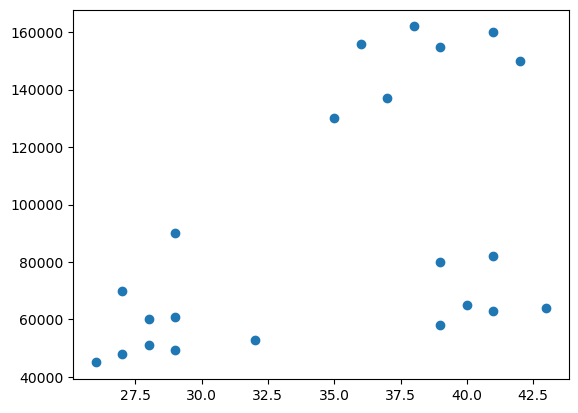

In [65]:
import matplotlib.pyplot as plt 
plt.scatter(df['Age'],df['Income($)'])

In [66]:
from sklearn.cluster import KMeans
data=df[["Age",'Income($)']].values
cluster=KMeans(n_clusters=3)
y_pred=cluster.fit_predict(data)
y_pred

A:\Apps\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
A:\Apps\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [67]:
df['cluster']=y_pred
df


,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [68]:
center=cluster.cluster_centers_
center

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

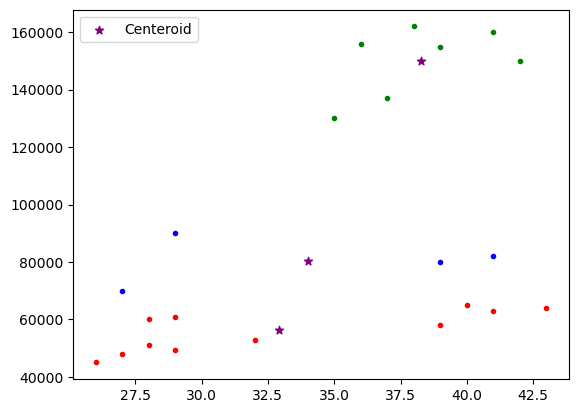

In [69]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]

plt.scatter(df0.Age,df0['Income($)'],marker='.',color='red')
plt.scatter(df1.Age,df1['Income($)'],marker='.',color='green')
plt.scatter(df2.Age,df2['Income($)'],marker='.',color='blue')
plt.scatter(center[:,0],center[:,1],marker='*',color='purple',label='Centeroid')
plt.legend()

In [70]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
df['Age']=scale.fit_transform(df[['Age']])
df['Income($)']=scale.fit_transform(df[['Income($)']])

In [71]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df[['Age','Income($)']])
y_pred

A:\Apps\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
A:\Apps\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [72]:
df['cluster']=y_pred
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


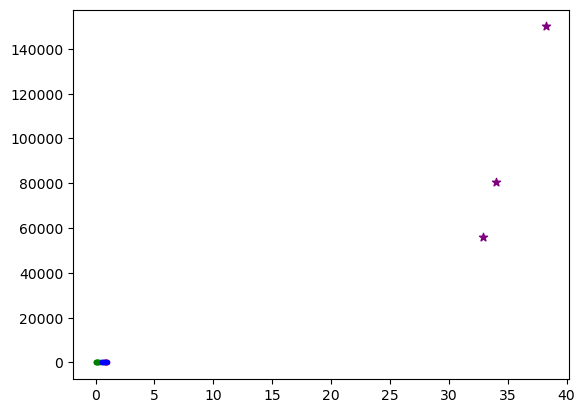

In [73]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],marker='.',color='red')
plt.scatter(df2.Age,df2['Income($)'],marker='.',color='green')
plt.scatter(df3.Age,df3['Income($)'],marker='.',color='blue')
plt.scatter(center[:,0],center[:,1],marker='*',color='purple',label='Centeroid')

A:\Apps\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
A:\Apps\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
A:\Apps\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
A:\Apps\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available thre

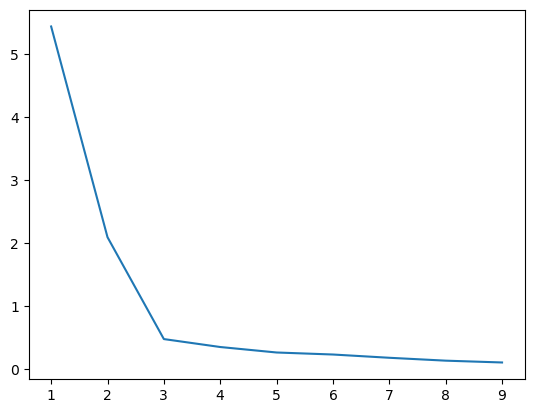

In [75]:
sse=[]
rng=range(1,10)
for i in rng:
    km=KMeans(n_clusters=i)
    km.fit_predict(df[['Age','Income($)']])
    sse.append(km.inertia_)
plt.plot(rng,sse)